TITANIC CLASSIFICATION
- **Workflow Summary:**

**Problem Definition:** Clearly define and understand the problem objectives.
    
**Data Setup:** Load necessary libraries and import the dataset.
    
**Exploratory Data Analysis (EDA):** Conduct in-depth data exploration to reveal patterns and insights.
    
**Feature Engineering and Processing:** Enhance model performance through feature engineering and data processing.
    
**Model Development:** Build predictive models using appropriate algorithms.
    
**Model Evaluation:** Assess model performance, refining and optimizing iteratively for improved accuracy.

**Problem Understanding and Definition:**

The objective is to develop a predictive model to determine the likelihood of passengers surviving the Titanic disaster. Leveraging machine learning techniques, the goal is to analyze the available dataset containing information such as name, age, gender, and socio-economic class, to predict and classify whether a passenger will survive or not.

# Data Loading and Importing the necessary libraries

In [1]:
# Linear algebra
import numpy as np

# Data manipulation and analysis
import pandas as pd

# Data visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import style

# Algorithms
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

# Loading the data files

In this analysis, we import and exclusively focus on the Training set from the Titanic dataset. Validation will be performed using data from the training set. Final predictions for submissions will be based on the test set.

In [2]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

train_df['train_test'] = 1
test_df['train_test'] = 0
# test_df['Survived'] = np.NaN
all_data = pd.concat([train_df,test_df])

%matplotlib inline
all_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'train_test'],
      dtype='object')

In [3]:
train_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,train_test
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,1
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,1
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,1
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,1
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,1


In [4]:
test_df.head(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,train_test
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,0
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S,0
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q,0
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S,0
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C,0
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S,0


# Dataset Overview:

The dataset comprises two distinct sets: 
- training set (train.csv)  
- test set (test.csv)

**Data Utilization Guidance:**

**Training Set:**

- **Purpose:** Build machine learning models.
- **Provided Information:** "Ground truth" (outcome) for each passenger.
- **Features Emphasized:** Gender, class, and potential new features through feature engineering.

**Test Set:**

- **Purpose:** Evaluate model performance on unseen data.
- **Information Provided:** No "ground truth" for each passenger.
- **Task:** Predict survival outcomes for test set passengers using the trained model.

**Data Dictionary**

| Variable | Definition | Key |
|----------|------------|-----|
| survival | Survival   | 0 = No, 1 = Yes |
| pclass   | Ticket class | 1 = 1st, 2 = 2nd, 3 = 3rd |
| sex      | Sex        |
| Age      | Age in years |
| sibsp    | # of siblings / spouses aboard the Titanic |
| parch    | # of parents / children aboard the Titanic |
| ticket   | Ticket number |
| fare     | Passenger fare |
| cabin    | Cabin number |
| embarked | Port of Embarkation | C = Cherbourg, Q = Queenstown, S = Southampton |


# Data understanding using Exploratory Data Analysis (EDA)

**Exploratory Data Analysis (EDA)** is a crucial process that involves initial investigations into data to uncover patterns, identify anomalies, test hypotheses, and validate assumptions. 

It employs summary statistics and visual representations to succinctly summarize key characteristics of datasets, facilitating a comprehensive understanding.

In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  train_test   891 non-null    int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 90.6+ KB


The training-set has 891 rows and 11 features + **the target variable (survived)**. 2 of the features are floats, 5 are integers and 5 are objects.

In [6]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,train_test
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.0
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,1.0
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429,0.0
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,1.0
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400,1.0
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,1.0
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000,1.0
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.0


**Conclusions from .describe() method**

**.describe() Function:**

- Utilized for understanding central tendencies of numeric data.
Survival Rate:

- Approximately 38% of the training set survived the Titanic.

**Age Distribution:**

- Passenger ages range from 0.4 to 80 years.

- 'Age' feature contains missing values (714 out of 891 entries).

**Outlier Detection in 'Fare':**

- An outlier is observed in the 'Fare' feature.
- Discrepancies between the 75th percentile, standard deviation, and the maximum value (512) suggest potential removal.

# Exploring missing data

In [7]:
total = train_df.isnull().sum().sort_values(ascending=False)
percent_1 = train_df.isnull().sum()/train_df.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_data.head(13)

,Total,%
Cabin,687,77.1
Age,177,19.9
Embarked,2,0.2
PassengerId,0,0.0
Survived,0,0.0
Pclass,0,0.0
Name,0,0.0
Sex,0,0.0
SibSp,0,0.0
Parch,0,0.0


**'Embarked' Feature:**
- Only 2 missing values.
- Easily fillable or droppable.

**'Age' Feature:**
- More challenging with 177 missing values.
- Requires careful handling.

**'Cabin' Feature:**
- Further investigation needed.
- 77% missing; consideration for dataset exclusion.

In [8]:
train_df.columns.values

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'train_test'],
      dtype=object)

Above we can see the 11 features and the target variable (survived). **What features could contribute to a high survival rate ?**

Correlation with Survival:
- Expect high correlation for all features except 'PassengerId', 'Name', and 'Ticket' with the survival rate.

# Dealing with the outlier

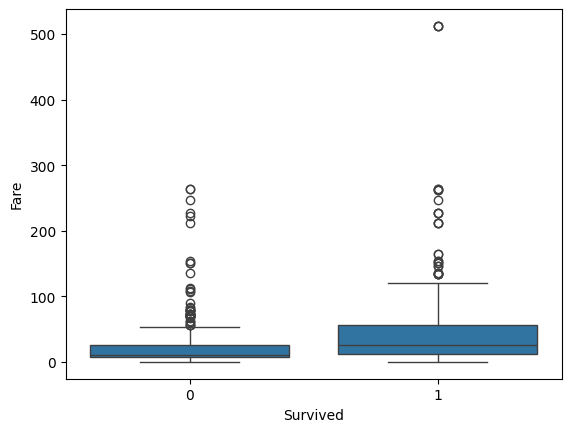

In [9]:
sns.boxplot(x='Survived',y='Fare',data=train_df);

**Passengers who paid over 300**

In [10]:
train_df[train_df['Fare']>300]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,train_test
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C,1
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C,1
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C,1


**Drop the outliers**

It might be beneficial to drop those outliers for the model. Further investigation needs to be done.

In [11]:
# train_df = train_df[train_df['Fare']<300]

**Maritime Tradition:**

- "The captain goes down with the ship" signifies a captain's ultimate responsibility for the ship and its passengers.
- Captain Edward Gifford Crosby exemplified this tradition on the Titanic, heroically attempting to save passengers, ultimately going down with the ship.

In [12]:
train_df[train_df['Name'].str.contains("Capt")]


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,train_test
745,746,0,1,"Crosby, Capt. Edward Gifford",male,70.0,1,1,WE/P 5735,71.0,B22,S,1


# Embarked, Pclass and Sex:

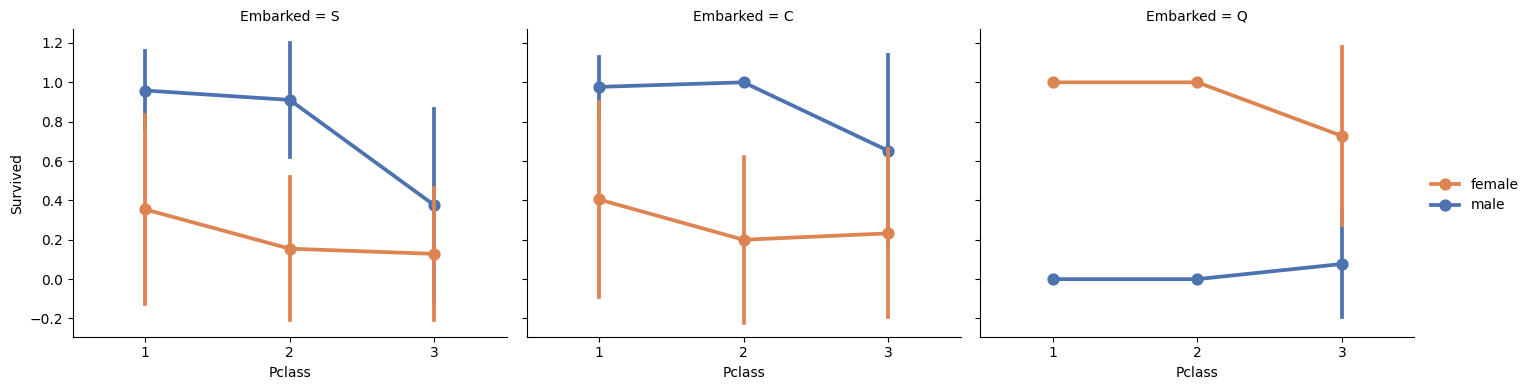

In [13]:
import seaborn as sns

# Create a FacetGrid
FacetGrid = sns.FacetGrid(train_df, col='Embarked', height=4, aspect=1.2)

# Use pointplot within the FacetGrid with 'errorbar' parameter set to 'sd'
FacetGrid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', errorbar='sd', palette='deep', order=None, hue_order=None)

# Add legend
FacetGrid.add_legend()


# Distribution of Pclass and Survived

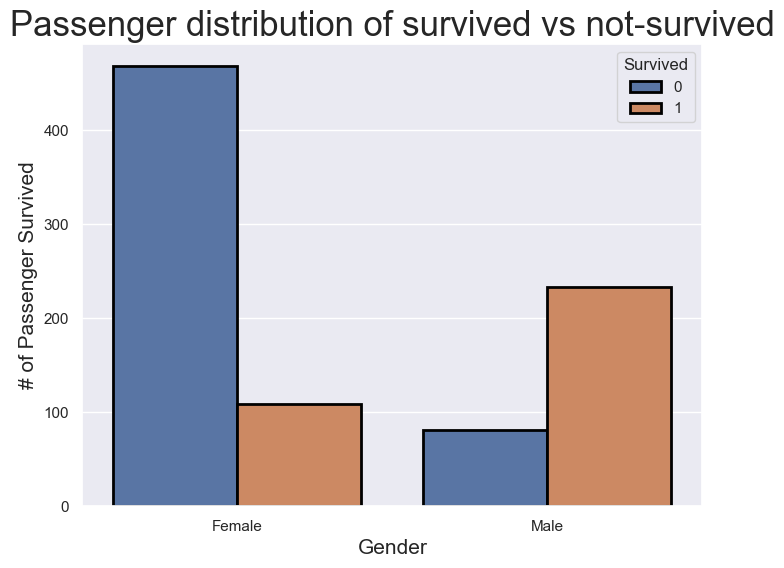

In [14]:
sns.set(style='darkgrid')
plt.subplots(figsize = (8,6))
ax=sns.countplot(x='Sex', data = train_df, hue='Survived', edgecolor=(0,0,0), linewidth=2)

# Fixing title, xlabel and ylabel
plt.title('Passenger distribution of survived vs not-survived', fontsize=25)
plt.xlabel('Gender', fontsize=15)
plt.ylabel("# of Passenger Survived", fontsize = 15)
labels = ['Female', 'Male']

# Fixing xticks.
plt.xticks(sorted(train_df.Survived.unique()),labels);

In [15]:
import pandas as pd

# Assuming train_df is a DataFrame
result = train_df.groupby(['Sex']).mean(numeric_only=True)
result

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,train_test
Sex,,,,,,,,
female,431.028662,0.742038,2.159236,27.915709,0.694268,0.649682,44.479818,1.0
male,454.147314,0.188908,2.389948,30.726645,0.429809,0.235702,25.523893,1.0


As previously mentioned, women are much more likely to survive than men. **74% of the women survived, while only 18% of men survived**.

**Conducting a detailed analysis of gender-based statistics to uncover nuanced differences between females and males.**

In [16]:
import pandas as pd

# Assuming train_df is a DataFrame
result = train_df.groupby(['Sex', 'Pclass']).mean(numeric_only=True)
result

PassengerId  Survived        Age     SibSp     Parch  \
Sex    Pclass                                                         
female 1        469.212766  0.968085  34.611765  0.553191  0.457447   
       2        443.105263  0.921053  28.722973  0.486842  0.605263   
       3        399.729167  0.500000  21.750000  0.895833  0.798611   
male   1        455.729508  0.368852  41.281386  0.311475  0.278689   
       2        447.962963  0.157407  30.740707  0.342593  0.222222   
       3        455.515850  0.135447  26.507589  0.498559  0.224784   

                     Fare  train_test  
Sex    Pclass                          
female 1       106.125798         1.0  
       2        21.970121         1.0  
       3        16.118810         1.0  
male   1        67.226127         1.0  
       2        19.741782         1.0  
       3        12.661633         1.0

Gender and Ticket class (Pclass) significantly influence survival rates. Women, particularly in the first and second class, exhibit notably higher survival rates than men. Additionally, men in the first class are nearly three times more likely to survive than their counterparts in the third class.

# Age and Sex distributions

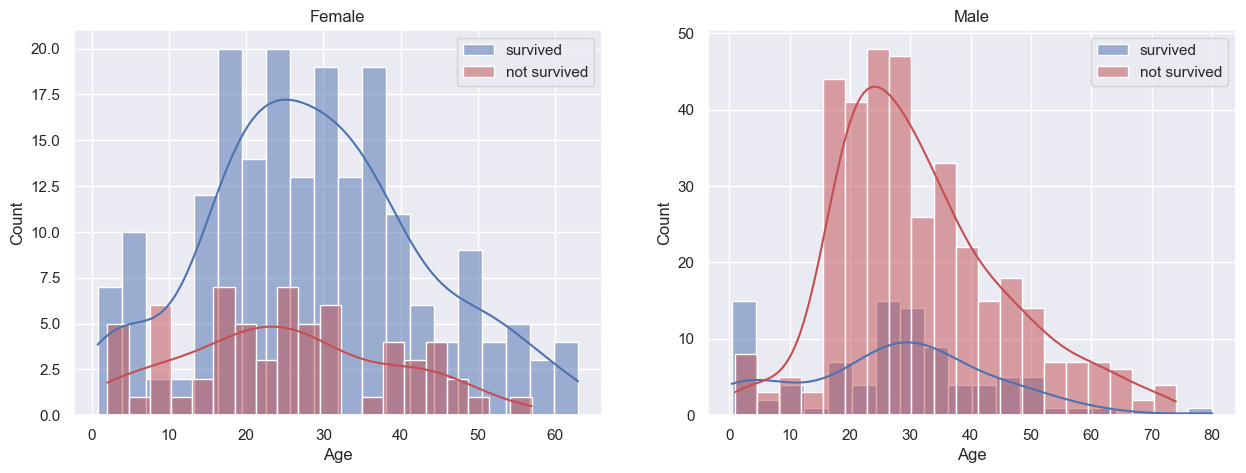

In [17]:
survived = 'survived'
not_survived = 'not survived'

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

women = train_df[train_df['Sex']=='female']
men = train_df[train_df['Sex']=='male']

# Plot Female Survived vs Not-Survived distribution
ax = sns.histplot(women[women['Survived']==1].Age.dropna(), bins=20, label = survived, ax = axes[0],color='b', kde=True)
ax = sns.histplot(women[women['Survived']==0].Age.dropna(), bins=20, label = not_survived, ax = axes[0],color='r', kde=True)
ax.legend()
ax.set_title('Female')

# Plot Male Survived vs Not-Survived distribution
ax = sns.histplot(men[men['Survived']==1].Age.dropna(), bins=20, label = survived, ax = axes[1],color='b', kde=True)
ax = sns.histplot(men[men['Survived']==0].Age.dropna(), bins=20, label = not_survived, ax = axes[1],color='r', kde=True)
ax.legend()
ax.set_title('Male');

Men between 18 and 35 exhibit higher survival probability, while women show increased chances between 15 and 40. 
Notably, male survival probability is low for ages 5-18 and after 35, contrasting with women. Infants consistently display higher survival likelihood.

# Saving children first

In [18]:
import pandas as pd

# Assuming train_df is a DataFrame
result = train_df[train_df['Age'] < 18].groupby(['Sex', 'Pclass']).mean(numeric_only=True)
result

PassengerId  Survived        Age     SibSp     Parch  \
Sex    Pclass                                                         
female 1        525.375000  0.875000  14.125000  0.500000  0.875000   
       2        369.250000  1.000000   8.333333  0.583333  1.083333   
       3        374.942857  0.542857   8.428571  1.571429  1.057143   
male   1        526.500000  1.000000   8.230000  0.500000  2.000000   
       2        527.818182  0.818182   4.757273  0.727273  1.000000   
       3        437.953488  0.232558   9.963256  2.069767  1.000000   

                     Fare  train_test  
Sex    Pclass                          
female 1       104.083337         1.0  
       2        26.241667         1.0  
       3        18.727977         1.0  
male   1       116.072900         1.0  
       2        25.659473         1.0  
       3        22.752523         1.0

Children below 18 years of age have higher chances of surviving, proven they saved childen first

# Passenger class distribution; Survived vs Non-Survived

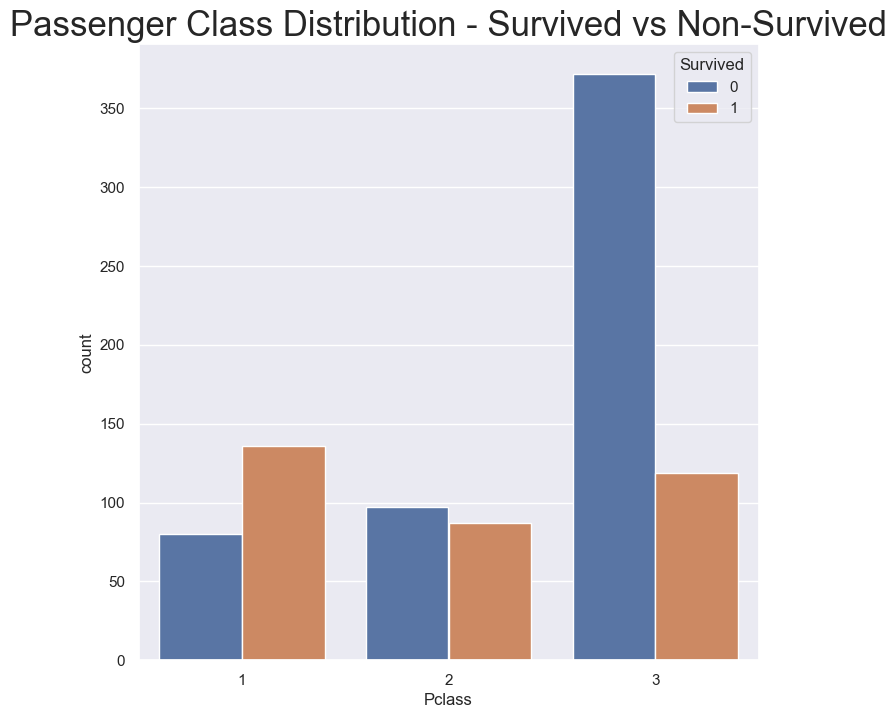

In [19]:
plt.subplots(figsize = (8,8))
ax=sns.countplot(x='Pclass',hue='Survived',data=train_df)
plt.title("Passenger Class Distribution - Survived vs Non-Survived", fontsize = 25);

([<matplotlib.axis.XTick at 0x1be348a8790>,
 [Text(1, 0, 'First'), Text(2, 0, 'Second'), Text(3, 0, 'Third')])

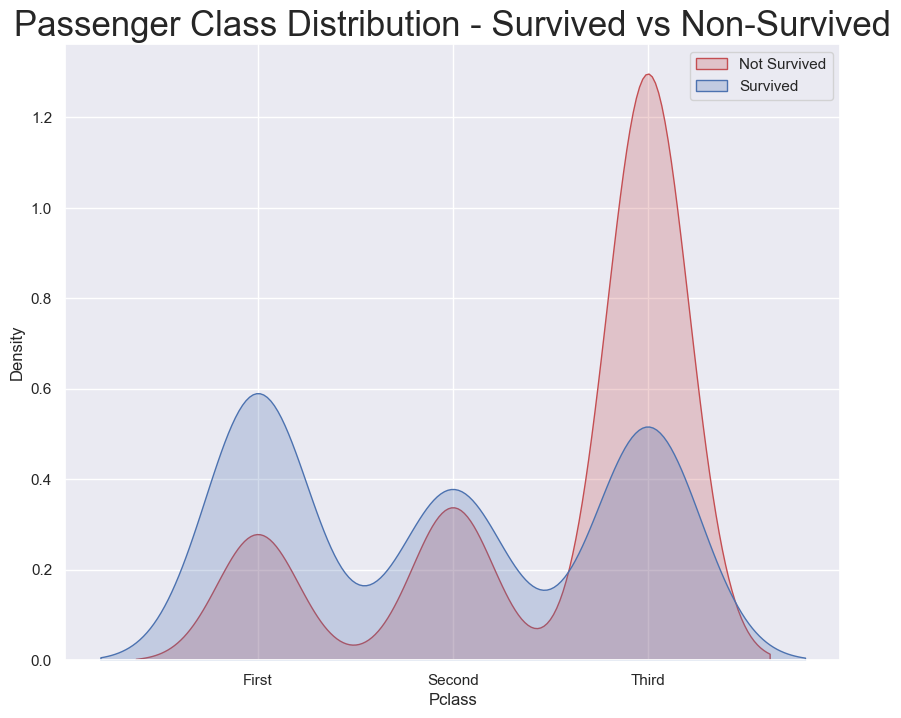

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.subplots(figsize=(10, 8))

# Plot KDE for Not Survived
ax = sns.kdeplot(train_df.loc[(train_df['Survived'] == 0), 'Pclass'], fill=True, color='r', label='Not Survived')
ax.legend()

# Plot KDE for Survived
ax = sns.kdeplot(train_df.loc[(train_df['Survived'] == 1), 'Pclass'], fill=True, color='b', label='Survived')
ax.legend()

plt.title("Passenger Class Distribution - Survived vs Non-Survived", fontsize=25)
labels = ['First', 'Second', 'Third']
plt.xticks(sorted(train_df.Pclass.unique()), labels)


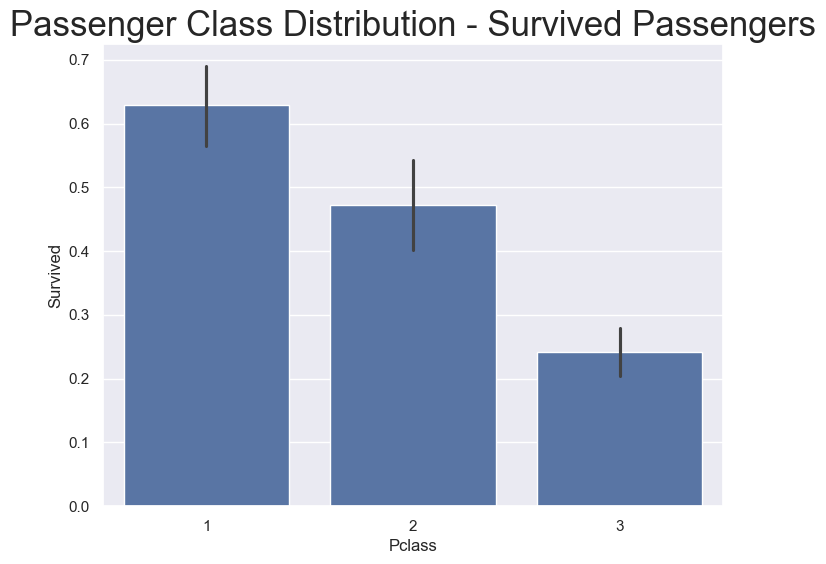

In [21]:
plt.subplots(figsize = (8,6))
sns.barplot(x='Pclass', y='Survived', data=train_df);
plt.title("Passenger Class Distribution - Survived Passengers", fontsize = 25);

Economic status (Pclass) significantly influenced survival on the Titanic. 
Notably, 1st class passengers had a 63% survival rate, 2nd class had 48%, while 3rd class exhibited a lower rate at 24%

# Correlation Matrix and Heatmap

In [22]:
# Look at numeric and categorical values separately 
df_num = train_df[['Age','SibSp','Parch','Fare']]
df_cat = train_df[['Survived','Pclass','Sex','Ticket','Cabin','Embarked']]

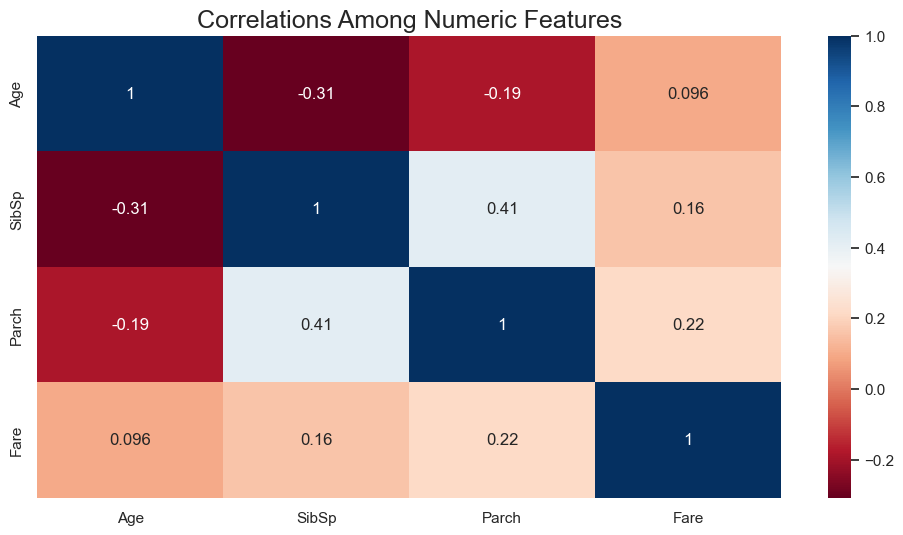

In [23]:
plt.subplots(figsize = (12,6))
sns.heatmap(df_num.corr(), annot=True,cmap="RdBu")
plt.title("Correlations Among Numeric Features", fontsize = 18);

# We notice from the heatmap above that:

- Parents and sibling like to travel together (light blue squares)
- Age has a high negative correlation with number of siblings

# Feature Engineering and Data Processing

**Feature Engineering** is the process of using raw data to create features that will be used for predictive modeling. Using, transforming, and combining existing features to define new features are also considered to be feature engineering.

# Drop 'PassengerId'

First, I will drop ‘PassengerId’ from the train set, because it does not contribute to a persons' survival probability. I will not drop it from the test set, since it is required for the submission.

In [24]:
train_df = train_df.drop(['PassengerId'], axis=1)
train_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,train_test
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


# Combining SibSp and Parch

SibSp and Parch would make more sense as a combined feature that shows the total number of relatives a person has on the Titanic. I will create the new feature 'relative' below, and also a value that shows if someone is not alone

In [25]:
data = [train_df, test_df]
for dataset in data:
    dataset['relatives'] = dataset['SibSp'] + dataset['Parch']
    dataset.loc[dataset['relatives'] > 0, 'not_alone'] = 0
    dataset.loc[dataset['relatives'] == 0, 'not_alone'] = 1
    dataset['not_alone'] = dataset['not_alone'].astype(int)
train_df['not_alone'].value_counts()

not_alone
1    537
0    354
Name: count, dtype: int64

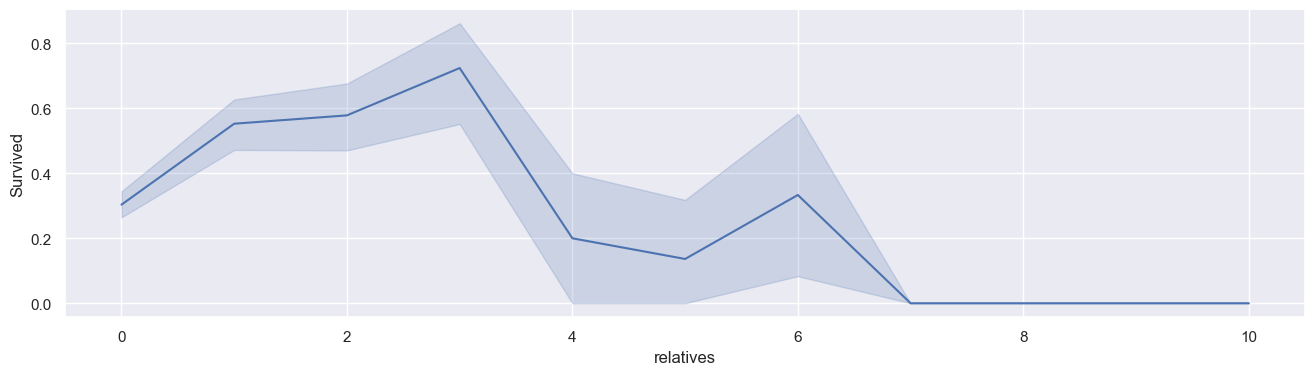

In [26]:
plt.subplots(figsize = (16,4))
ax = sns.lineplot(x='relatives',y='Survived', data=train_df)

# Missing Data

As a reminder, we have to deal with **Cabin (687 missing values), Embarked (2 missing values) and Age (177 missing values).**

In [27]:
import re
deck = {"A": 1, "B": 2, "C": 3, "D": 4, "E": 5, "F": 6, "G": 7, "U": 8}
data = [train_df, test_df]

for dataset in data:
    dataset['Cabin'] = dataset['Cabin'].fillna("U0")
    dataset['Deck'] = dataset['Cabin'].map(lambda x: re.compile("([a-zA-Z]+)").search(x).group())
    dataset['Deck'] = dataset['Deck'].map(deck)
    dataset['Deck'] = dataset['Deck'].fillna(0)
    dataset['Deck'] = dataset['Deck'].astype(int)

In [28]:
# We can now drop the Cabin feature
train_df = train_df.drop(['Cabin'], axis=1)
test_df = test_df.drop(['Cabin'], axis=1)

# Age

Addressing the substantial number of missing 'Age' values (177 data points, as discussed in Section 3.1 - Dealing with Missing Values), a normalization approach involves generating random numbers computed from the mean age value and standard deviation, considering the presence of null values.

In [29]:
data = [train_df, test_df]

for dataset in data:
    mean = train_df["Age"].mean()
    std = test_df["Age"].std()
    is_null = dataset["Age"].isnull().sum()
    
    # Compute random numbers between the mean, std and is_null
    rand_age = np.random.randint(mean - std, mean + std, size = is_null)
    
    # Fill NaN values in Age column with random values generated
    age_slice = dataset["Age"].copy()
    age_slice[np.isnan(age_slice)] = rand_age
    dataset["Age"] = age_slice
    dataset["Age"] = train_df["Age"].astype(int)

In [30]:
train_df["Age"].isnull().sum()

0

# Embarked

Since the Embarked feature has only 2 missing values, we will fill these with the most common one.

In [31]:
train_df['Embarked'].describe()

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

We notice the most popular embark location is **Southampton (S).**

In [32]:
common_value = 'S'
data = [train_df, test_df]

for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].fillna(common_value)

In [33]:
train_df['Embarked'].isnull().sum()

0

# Converting Features

In [34]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Pclass      891 non-null    int64  
 2   Name        891 non-null    object 
 3   Sex         891 non-null    object 
 4   Age         891 non-null    int32  
 5   SibSp       891 non-null    int64  
 6   Parch       891 non-null    int64  
 7   Ticket      891 non-null    object 
 8   Fare        891 non-null    float64
 9   Embarked    891 non-null    object 
 10  train_test  891 non-null    int64  
 11  relatives   891 non-null    int64  
 12  not_alone   891 non-null    int32  
 13  Deck        891 non-null    int32  
dtypes: float64(1), int32(3), int64(6), object(4)
memory usage: 87.1+ KB


We can see that **'Fare'** is a float data-type. Also, we need to deal with 4 categorical features: **Name, Sex, Ticket, and Embarked**

**Fare**
Converting 'Fare' from **float64** to **int64** using the **astype()** function provided by pandas

In [35]:
data = [train_df, test_df]

for dataset in data:
    dataset['Fare'] = dataset['Fare'].fillna(0)
    dataset['Fare'] = dataset['Fare'].astype(int)

In [36]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Survived    891 non-null    int64 
 1   Pclass      891 non-null    int64 
 2   Name        891 non-null    object
 3   Sex         891 non-null    object
 4   Age         891 non-null    int32 
 5   SibSp       891 non-null    int64 
 6   Parch       891 non-null    int64 
 7   Ticket      891 non-null    object
 8   Fare        891 non-null    int32 
 9   Embarked    891 non-null    object
 10  train_test  891 non-null    int64 
 11  relatives   891 non-null    int64 
 12  not_alone   891 non-null    int32 
 13  Deck        891 non-null    int32 
dtypes: int32(4), int64(6), object(4)
memory usage: 83.7+ KB


# Name

Feature Engineering the name of passengers to extract a person's title (Mr, Miss, Master, and Other), so we can build another feature called **'Title'** out of it.

In [37]:
data = [train_df, test_df]
titles = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Other": 5}

for dataset in data:
    # Extract titles
    dataset['Title'] = dataset.Name.str.extract('([A-Za-z]+)\.', expand=False)
    
    # Replace titles with a more common title or as Other
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr','Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Other')
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    
    # Convert titles into numbers
    dataset['Title'] = dataset['Title'].map(titles)
    
    # Filling NaN with 0 just to be safe
    dataset['Title'] = dataset['Title'].fillna(0)

In [38]:
train_df = train_df.drop(['Name'], axis=1)
test_df = test_df.drop(['Name'], axis=1)

In [39]:
# Checking results
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,train_test,relatives,not_alone,Deck,Title
0,0,3,male,22,1,0,A/5 21171,7,S,1,1,0,8,1
1,1,1,female,38,1,0,PC 17599,71,C,1,1,0,3,3
2,1,3,female,26,0,0,STON/O2. 3101282,7,S,1,0,1,8,2
3,1,1,female,35,1,0,113803,53,S,1,1,0,3,3
4,0,3,male,35,0,0,373450,8,S,1,0,1,8,1


**Sex**

Convert feature 'Sex' into numeric values

male = 0
female = 1

In [40]:
genders = {"male": 0, "female": 1}
data = [train_df, test_df]

for dataset in data:
    dataset['Sex'] = dataset['Sex'].map(genders)

In [41]:
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,train_test,relatives,not_alone,Deck,Title
0,0,3,0,22,1,0,A/5 21171,7,S,1,1,0,8,1
1,1,1,1,38,1,0,PC 17599,71,C,1,1,0,3,3
2,1,3,1,26,0,0,STON/O2. 3101282,7,S,1,0,1,8,2
3,1,1,1,35,1,0,113803,53,S,1,1,0,3,3
4,0,3,0,35,0,0,373450,8,S,1,0,1,8,1


# Ticket

In [42]:
train_df['Ticket'].describe()

count        891
unique       681
top       347082
freq           7
Name: Ticket, dtype: object

Since the **'Ticket'** feature has 681 unique values, it would be very hard to convert them into an useful feature. **Hence, we will drop it from the DataFrame.**

In [43]:
train_df = train_df.drop(['Ticket'], axis=1)
test_df = test_df.drop(['Ticket'], axis=1)

In [44]:
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,train_test,relatives,not_alone,Deck,Title
0,0,3,0,22,1,0,7,S,1,1,0,8,1
1,1,1,1,38,1,0,71,C,1,1,0,3,3
2,1,3,1,26,0,0,7,S,1,0,1,8,2
3,1,1,1,35,1,0,53,S,1,1,0,3,3
4,0,3,0,35,0,0,8,S,1,0,1,8,1


**Convert 'Embarked' feature into numeric values**

In [45]:
ports = {"S": 0, "C": 1, "Q": 2}
data = [train_df, test_df]

for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].map(ports)

In [46]:
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,train_test,relatives,not_alone,Deck,Title
0,0,3,0,22,1,0,7,0,1,1,0,8,1
1,1,1,1,38,1,0,71,1,1,1,0,3,3
2,1,3,1,26,0,0,7,0,1,0,1,8,2
3,1,1,1,35,1,0,53,0,1,1,0,3,3
4,0,3,0,35,0,0,8,0,1,0,1,8,1


# Creating new Categories

In [47]:
data = [train_df, test_df]
for dataset in data:
    dataset['Age'] = dataset['Age'].astype(int)
    dataset.loc[ dataset['Age'] <= 11, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 11) & (dataset['Age'] <= 18), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 18) & (dataset['Age'] <= 22), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 22) & (dataset['Age'] <= 27), 'Age'] = 3
    dataset.loc[(dataset['Age'] > 27) & (dataset['Age'] <= 33), 'Age'] = 4
    dataset.loc[(dataset['Age'] > 33) & (dataset['Age'] <= 40), 'Age'] = 5
    dataset.loc[(dataset['Age'] > 40) & (dataset['Age'] <= 66), 'Age'] = 6
    dataset.loc[ dataset['Age'] > 66, 'Age'] = 6

In [48]:
# Checking the distribution
train_df['Age'].value_counts()

Age
6    164
4    163
5    143
3    140
2    112
1    101
0     68
Name: count, dtype: int64

**Fare**

For the 'Fare' feature, we need to do the same as with the 'Age' feature. But it isn't that easy, because if we cut the range of the fare values into a few equally big categories, 80% of the values would fall into the first category. Fortunately, we can use pandas "qcut()" function, that we can use to see, how we can form the categories.

In [49]:
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,train_test,relatives,not_alone,Deck,Title
0,0,3,0,2,1,0,7,0,1,1,0,8,1
1,1,1,1,5,1,0,71,1,1,1,0,3,3
2,1,3,1,3,0,0,7,0,1,0,1,8,2
3,1,1,1,5,1,0,53,0,1,1,0,3,3
4,0,3,0,5,0,0,8,0,1,0,1,8,1


In [50]:
pd.qcut(train_df['Fare'], q=6)

0      (-0.001, 7.0]
1      (52.0, 512.0]
2      (-0.001, 7.0]
3      (52.0, 512.0]
4         (7.0, 8.0]
           ...      
886      (8.0, 14.0]
887     (26.0, 52.0]
888     (14.0, 26.0]
889     (26.0, 52.0]
890    (-0.001, 7.0]
Name: Fare, Length: 891, dtype: category
Categories (6, interval[float64, right]): [(-0.001, 7.0] < (7.0, 8.0] < (8.0, 14.0] < (14.0, 26.0] < (26.0, 52.0] < (52.0, 512.0]]

Using the values from **pd.qcut()** to create bins for Fare

In [51]:
data = [train_df, test_df]

for dataset in data:
    dataset.loc[ dataset['Fare'] <= 7, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7) & (dataset['Fare'] <= 8), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 8) & (dataset['Fare'] <= 14), 'Fare']   = 2
    dataset.loc[(dataset['Fare'] > 14) & (dataset['Fare'] <= 26), 'Fare']   = 3
    dataset.loc[(dataset['Fare'] > 26) & (dataset['Fare'] <= 52), 'Fare']   = 4
    dataset.loc[dataset['Fare'] > 52, 'Fare'] = 5
    dataset['Fare'] = dataset['Fare'].astype(int)

In [52]:
# Checking the dataset
train_df.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,train_test,relatives,not_alone,Deck,Title
0,0,3,0,2,1,0,0,0,1,1,0,8,1
1,1,1,1,5,1,0,5,1,1,1,0,3,3
2,1,3,1,3,0,0,0,0,1,0,1,8,2
3,1,1,1,5,1,0,5,0,1,1,0,3,3
4,0,3,0,5,0,0,1,0,1,0,1,8,1
5,0,3,0,1,0,0,1,2,1,0,1,8,1
6,0,1,0,6,0,0,4,0,1,0,1,5,1
7,0,3,0,0,3,1,3,0,1,4,0,8,4
8,1,3,1,3,0,2,2,0,1,2,0,8,3
9,1,2,1,1,1,0,4,1,1,1,0,8,3


# Model building

In [53]:
X_train = train_df.drop("Survived", axis=1)
Y_train = train_df["Survived"]
X_test  = test_df.drop("PassengerId", axis=1).copy()

# Stochastic Gradient Descent (SGD)

In [54]:
sgd = linear_model.SGDClassifier(max_iter=5, tol=None)
sgd.fit(X_train, Y_train)

Y_pred = sgd.predict(X_test)

sgd.score(X_train, Y_train)
acc_sgd = round(sgd.score(X_train, Y_train) * 100, 2)

# Print score
print(round(acc_sgd,2,), "%")

79.8 %


# Decision Tree

In [55]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)

Y_pred = decision_tree.predict(X_test)

acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)

# Print score
print(round(acc_decision_tree,2,), "%")

93.15 %


# Random Forest

In [56]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)

Y_prediction = random_forest.predict(X_test)

random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)

# Print score
print(round(acc_random_forest,2,), "%")

93.15 %


# Logistic Regression

In [57]:
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)

Y_pred = logreg.predict(X_test)

acc_log = round(logreg.score(X_train, Y_train) * 100, 2)

# Print score
print(round(acc_log,2,), "%")

81.14 %


# KNN

In [58]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)

Y_pred = knn.predict(X_test)

acc_knn = round(knn.score(X_train, Y_train) * 100, 2)

# Print score
print(round(acc_knn,2,), "%")

84.96 %


# Gaussian Naive Bayes

In [59]:
gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)

Y_pred = gaussian.predict(X_test)

acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)

# Print score
print(round(acc_gaussian,2,), "%")

78.68 %


# Perceptron

In [60]:
perceptron = Perceptron(max_iter=1000)
perceptron.fit(X_train, Y_train)

Y_pred = perceptron.predict(X_test)

acc_perceptron = round(perceptron.score(X_train, Y_train) * 100, 2)

# Print score
print(round(acc_perceptron,2,), "%")

81.03 %


# Model evaluation

**Which one is the best model?**

In [61]:
results = pd.DataFrame({
    'Model': ['KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 
              'Decision Tree'],
    'Score': [acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, acc_perceptron, 
              acc_sgd, acc_decision_tree]})

result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df.head(9)

,Model
Score,
93.15,Random Forest
93.15,Decision Tree
84.96,KNN
81.14,Logistic Regression
81.03,Perceptron
79.80,Stochastic Gradient Decent
78.68,Naive Bayes


The **Random Forest** classifier goes on top of the Machine Learning models, followed by **Decision Tree** and **KNN** respectfully. Now we need to check how the Random Forest performs by using cross validation.

# K-Fold Cross Validation

K-Fold Cross Validation involves randomly dividing the training data into **K subsets (folds)**. In each iteration, the random forest model is trained and validated K times, using a different fold for validation each time and training on the remaining folds. This process is repeated until every fold serves as an evaluation set, ensuring comprehensive model assessment.

In [62]:
from sklearn.model_selection import cross_val_score

rf = RandomForestClassifier(n_estimators=100)
scores = cross_val_score(rf, X_train, Y_train, cv=10, scoring = "accuracy")

In [63]:
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

Scores: [0.81111111 0.84269663 0.75280899 0.85393258 0.86516854 0.84269663
 0.79775281 0.75280899 0.86516854 0.83146067]
Mean: 0.8215605493133582
Standard Deviation: 0.039965354829054646


This looks much more realistic than before. The **Random Forest classifier** model has an average **accuracy of 81%** with a **standard deviation of 3.9%**. The standard deviation tell us how precise the estimates are.

This means the accuracy of our model can differ **± 3.9%**

The accuracy appears promising. Given the user-friendly nature of Random Forest, we aim to enhance its performance further in the upcoming section.

# Random Forest

In [64]:
importances = pd.DataFrame({'feature':X_train.columns,'importance':np.round(random_forest.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')

In [65]:
importances.head(12)

,importance
feature,
Title,0.227
Age,0.154
Sex,0.144
Fare,0.103
Deck,0.095
Pclass,0.089
relatives,0.063
Embarked,0.050
SibSp,0.037


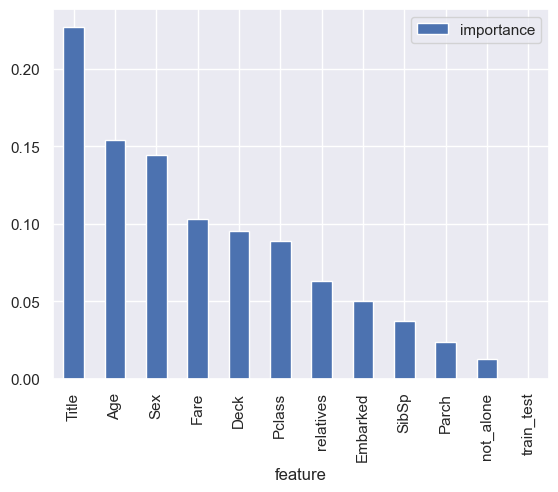

In [66]:
importances.plot.bar();

# Results

**'not_alone' and 'Parch' don't play a significant role in the Random Forest classifiers prediction process.** Thus, I will drop them from the DataFrame and train the classifier once again. We could also remove more features, however, this would inquire more investigations of the feature's effect on our model. For now, I will only remove 'not_alone' and 'Parch' from the DataFrame.

In [67]:
# Dropping not_alone
train_df  = train_df.drop("not_alone", axis=1)
test_df  = test_df.drop("not_alone", axis=1)

# Dropping Parch
train_df  = train_df.drop("Parch", axis=1)
test_df  = test_df.drop("Parch", axis=1)

In [68]:
# # Reassigning features
X_train = train_df.drop("Survived", axis=1)
Y_train = train_df["Survived"]
X_test  = test_df.drop("PassengerId", axis=1).copy()

# Training the Random Forest classifier once again

In [69]:
random_forest = RandomForestClassifier(n_estimators=100, oob_score = True)
random_forest.fit(X_train, Y_train)

Y_prediction = random_forest.predict(X_test)

random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)

# Print scores
print(round(acc_random_forest,2,), "%")

93.15 %


**Feature importance without 'not_alone' and 'Parch' features**

In [70]:
importances = pd.DataFrame({'feature':X_train.columns,'importance':np.round(random_forest.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')

In [71]:
importances.head(12)

,importance
feature,
Title,0.204
Sex,0.183
Age,0.156
Fare,0.103
Pclass,0.088
Deck,0.088
relatives,0.085
SibSp,0.049
Embarked,0.046


The **Random Forest** model predicts as good as it did before. A general rule is that, the more features you have, the more likely your model will suffer from overfitting and vice versa. But I think our data looks fine for now and hasn't too much features.

Moreover, there is another way to validate the Random Forest classifier, which is as accurate as the score used before. We can use something called **Out of Bag (OOB) score** to estimate the generalization accuracy. **Basically, the OOB score is computed as the number of correctly predicted rows from the out of the bag sample.**

In [72]:
print("oob score:", round(random_forest.oob_score_, 4)*100, "%")

oob score: 82.49 %


Now we can start tuning the **hyperameters** of random forest.

# Hyperparameter Tuning

In [73]:
# Simple performance reporting function
def clf_performance(classifier, model_name):
    print(model_name)
    print('Best Score: ' + str(classifier.best_score_))
    print('Best Parameters: ' + str(classifier.best_params_))

In [74]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=1)
param_grid = {
    'n_estimators': [400, 500],
    'criterion': ['gini', 'entropy'],
    'bootstrap': [True],
    'max_depth': [15, 20],
    'max_features': ['sqrt', 'log2'],
    'min_samples_leaf': [2, 3],
    'min_samples_split': [2, 3]
}

clf_rf = GridSearchCV(rf, param_grid=param_grid, cv=5, verbose=True, n_jobs=-1)
best_clf_rf = clf_rf.fit(X_train, Y_train)

# Print score
clf_performance(best_clf_rf, 'Random Forest')


Fitting 5 folds for each of 64 candidates, totalling 320 fits


Random Forest
Best Score: 0.8350009415604795
Best Parameters: {'bootstrap': True, 'criterion': 'gini', 'max_depth': 15, 'max_features': 'sqrt', 'min_samples_leaf': 3, 'min_samples_split': 2, 'n_estimators': 400}


# Testing new parameters

In [75]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(criterion="gini",
                                       max_depth=20,
                                       min_samples_leaf=3,
                                       min_samples_split=2,
                                       n_estimators=450,
                                       oob_score=True,
                                       random_state=1,
                                       n_jobs=-1)

random_forest.fit(X_train, Y_train)
Y_prediction = random_forest.predict(X_test)

random_forest.score(X_train, Y_train)

print("oob score:", round(random_forest.oob_score_, 4) * 100, "%")


oob score: 83.16 %


# Further evaluation

# Confusion Matrix

In [76]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

predictions = cross_val_predict(random_forest, X_train, Y_train, cv=3)
confusion_matrix(Y_train, predictions)

array([[496,  53],
       [ 95, 247]], dtype=int64)

The first row is about the not-survived-predictions: **494 passengers were correctly classified as not survived** (called true negatives) and **55 where wrongly classified as not survived** (false positives).

The second row is about the survived-predictions: **98 passengers where wrongly classified as survived** (false negatives) and **244 where correctly classified as survived** (true positives).

A confusion matrix produces an idea of how accurate the model is.

# Precision and Recall

In [77]:
from sklearn.metrics import precision_score, recall_score

print("Precision:", precision_score(Y_train, predictions))
print("Recall:",recall_score(Y_train, predictions))

Precision: 0.8233333333333334
Recall: 0.7222222222222222


Our model predicts correctly that **a passenger survived 81% of the time** (precision). The **recall** tells us that **71% of the passengers tested actually survived.**

# F-score

It is possible to combine precision and recall into one score, which is called the F-score. The F-score is computed with the harmonic mean of precision and recall. Note that it assigns more weight to low values. As a result, the classifier will only get a high F-score if both recall and precision are high.

In [78]:
from sklearn.metrics import f1_score
f1_score(Y_train, predictions)

0.7694704049844237

There we have it, a **76% F-score**. The score is not high because we have a recall of 71%. Unfortunately, the F-score is not perfect, because it favors classifiers that have a similar precision and recall. This can be a problem because often times we are searching for a high precision and other times a high recall. An increase of precision can result in a decrease of recall, and vice versa (depending on the threshold). This is called the **precision/recall trade-off**.

# Precision Recall Curve

For each person the Random Forest algorithm has to classify, it computes a probability based on a function and it classifies the person as **survived** (when the score is bigger the than threshold) or as **not survived** (when the score is smaller than the threshold). That’s why the threshold plays an important part in this process.

Let's plot the precision and recall with the threshold using matplotlib.

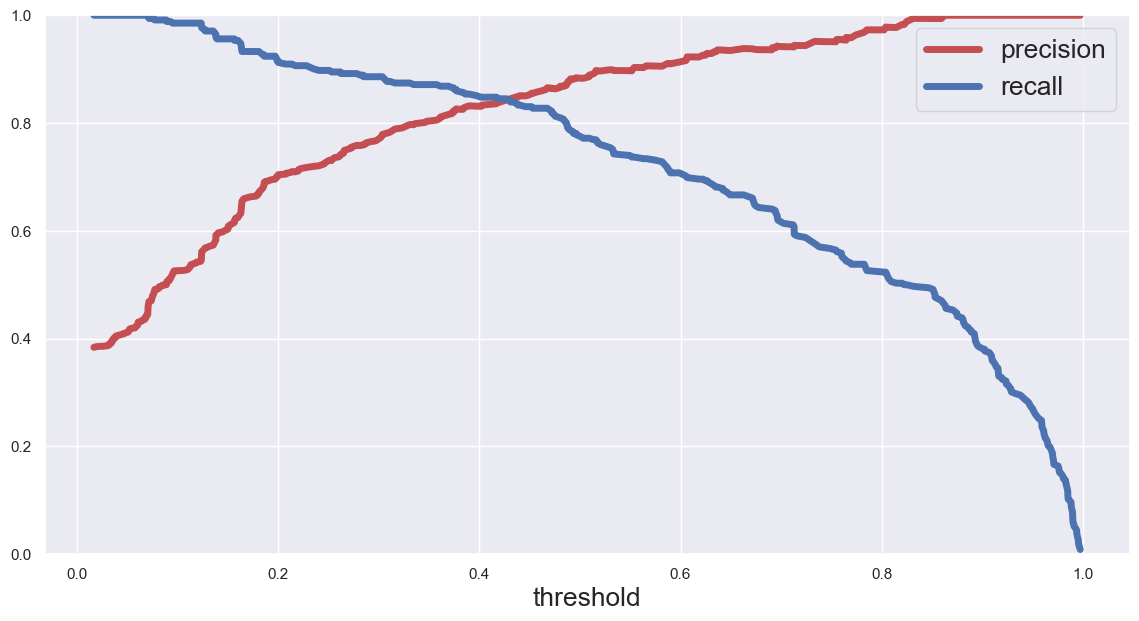

In [79]:
from sklearn.metrics import precision_recall_curve

# Getting the probabilities of our predictions
y_scores = random_forest.predict_proba(X_train)
y_scores = y_scores[:,1]

precision, recall, threshold = precision_recall_curve(Y_train, y_scores)
def plot_precision_and_recall(precision, recall, threshold):
    plt.plot(threshold, precision[:-1], "r", label="precision", linewidth=5)
    plt.plot(threshold, recall[:-1], "b", label="recall", linewidth=5)
    plt.xlabel("threshold", fontsize=19)
    plt.legend(loc="upper right", fontsize=19)
    plt.ylim([0, 1])

plt.figure(figsize=(14, 7))
plot_precision_and_recall(precision, recall, threshold)
plt.show()

We can see in the graph above that the recall is falling of rapidly when the precision reaches around 85%. Thus, we may want to select the precision/recall trade-off before this point (maybe at around 75%).

Now we are able to choose a threshold, that gives the best precision/recall trade-off for the current problem. For example, if a precision of 80% is required, we can easily look at the plot and identify the threshold needed, which is around 0.4. Then we could train the model with exactly that threshold and expect the desired accuracy.

**Another way is to plot the precision and recall against each other:**

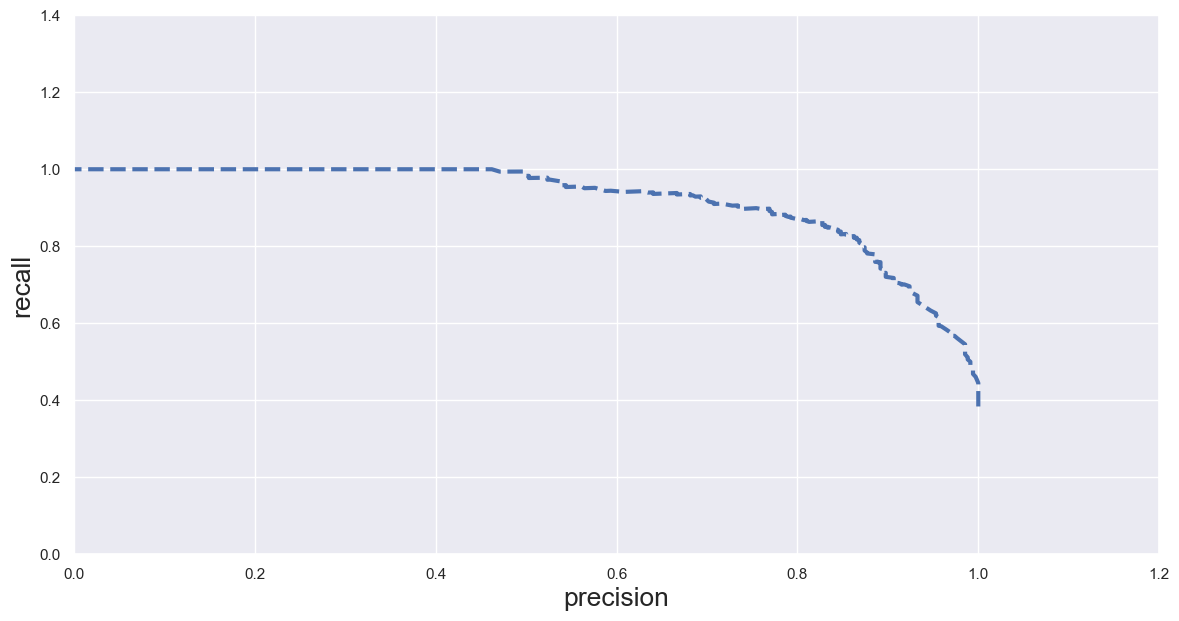

In [80]:
def plot_precision_vs_recall(precision, recall):
    plt.plot(recall, precision, "b--", linewidth=3)
    plt.xlabel("precision", fontsize=19)
    plt.ylabel("recall", fontsize=19)
    plt.axis([0, 1.2, 0, 1.4])

plt.figure(figsize=(14, 7))
plot_precision_vs_recall(precision, recall)
plt.show()

# ROC AUC Curve

Another way to evaluate and compare binary classifiers is the ROC AUC Curve. This curve plots the true positive rate (also called recall) against the false positive rate (ratio of incorrectly classified negative instances), instead of plotting the precision versus the recall values.

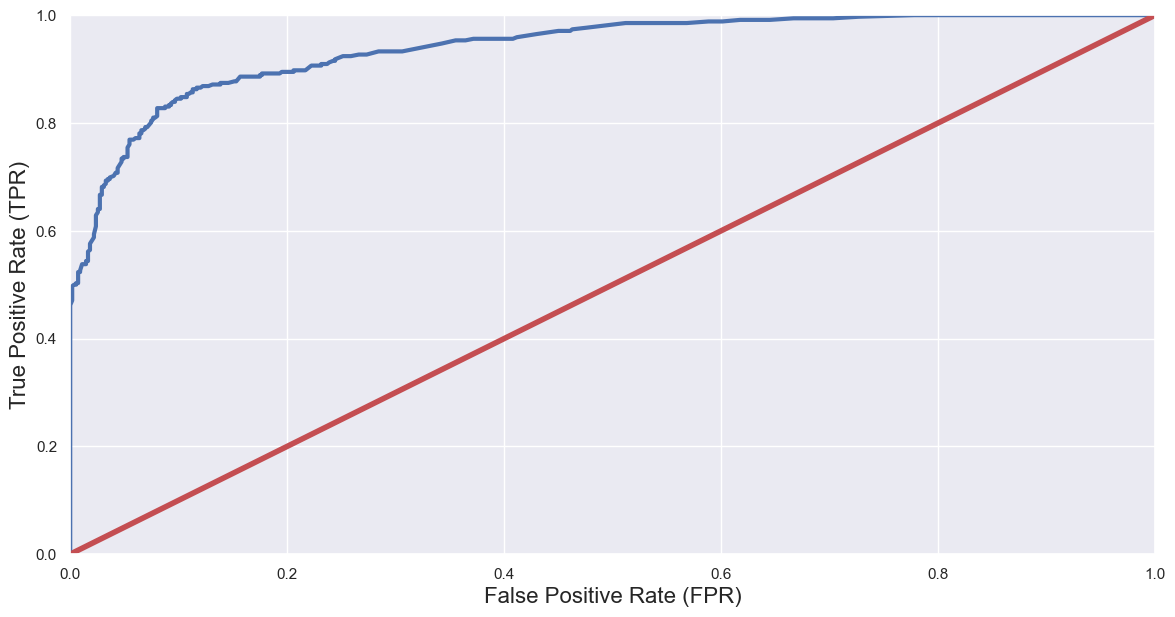

In [81]:
from sklearn.metrics import roc_curve

# Compute true positive rate and false positive rate
false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_train, y_scores)

# Plotting them against each other
def plot_roc_curve(false_positive_rate, true_positive_rate, label=None):
    plt.plot(false_positive_rate, true_positive_rate, linewidth=3, label=label)
    plt.plot([0, 1], [0, 1], 'r', linewidth=4)
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate (FPR)', fontsize=16)
    plt.ylabel('True Positive Rate (TPR)', fontsize=16)

plt.figure(figsize=(14, 7))
plot_roc_curve(false_positive_rate, true_positive_rate)
plt.show()

The red line represents a purely random classifier (e.g. a coin flip). Thus, the classifier should be as far away from it as possible. The Random Forest model looks good.

There's a tradeoff here because the classifier produces more false positives the higher the true positive rate is.



# ROC AUC Score

The ROC AUC Score is the corresponding score to the ROC AUC Curve. It is simply computed by measuring the area under the curve, which is called AUC.

A classifier that is 100% correct would have a ROC AUC Score of 1, and a completely random classifier would have a score of 0.5.

In [82]:
from sklearn.metrics import roc_auc_score
r_a_score = roc_auc_score(Y_train, y_scores)
print("ROC-AUC-Score:", r_a_score)

ROC-AUC-Score: 0.9397682122732454


# THANKS!!